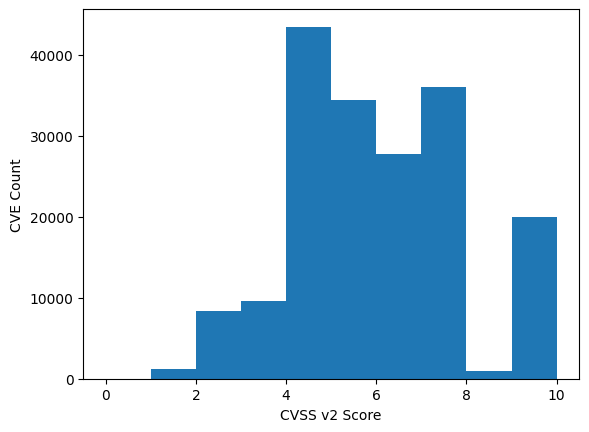

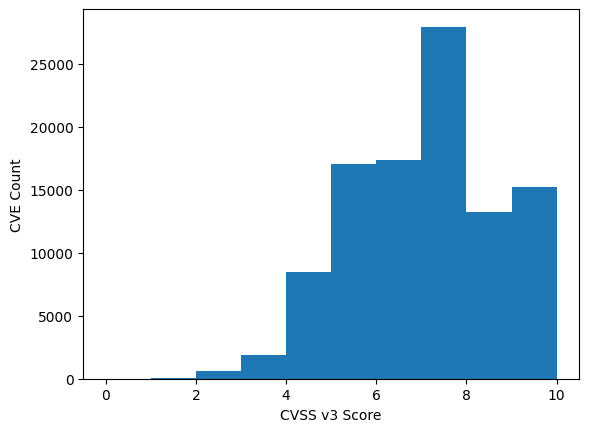

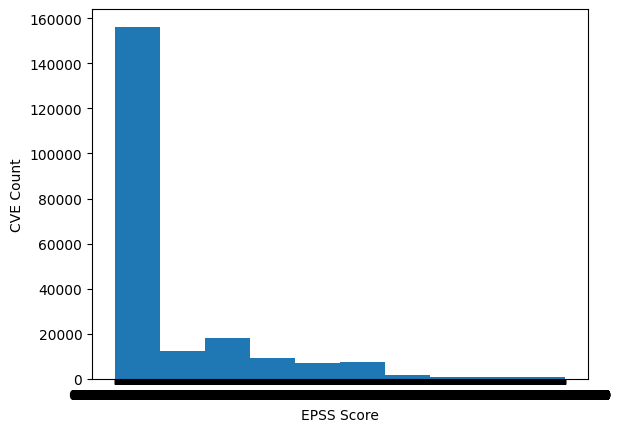

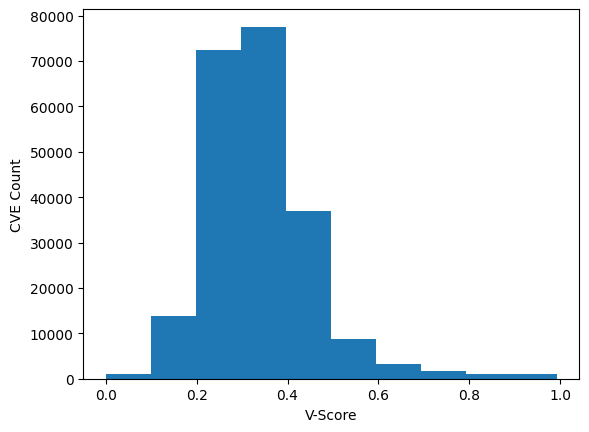

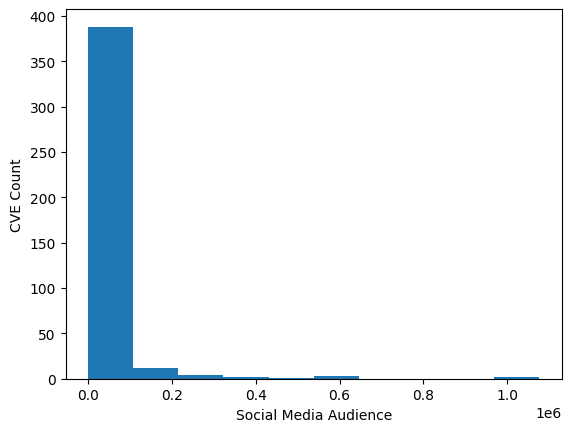

In [4]:
import matplotlib.pyplot as plt
import json

# Opening JSON file
f = open('../data.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)
 
# Iterating through the json list and populate histograms
x_vendor_count = {}
x_cvssv2 = []
x_cvssv3 = []
x_epss = []
x_vscore = []
x_social_media = []
for i in data['cves']:
#     print(i)
#     break
    if 'cvssv2' in i:
        if i['cvssv2'] is not None:
            x_cvssv2.append(i['cvssv2'])
    if 'cvssv3' in i:
        if i['cvssv3'] is not None:
            x_cvssv3.append(i['cvssv3'])
    if 'epss' in i:
        if i['epss'] is not None:
            x_epss.append(i['epss'])
    if 'v_score' in i:
        if i['v_score'] is not None:
            x_vscore.append(i['v_score'])
    if 'social_media_audience' in i:
        if i['social_media_audience'] is not None:
            x_social_media.append(i['social_media_audience'])
    if 'vendors' in i:
        if i['vendors'] is not None:
            for ven in i['vendors']:
                if ven in x_vendor_count:
                    x_vendor_count[ven] += 1
                else:
                    x_vendor_count[ven] = 0

plt.hist(x_cvssv2)
plt.xlabel("CVSS v2 Score")
plt.ylabel("CVE Count")
plt.show()

plt.hist(x_cvssv3)
plt.xlabel("CVSS v3 Score")
plt.ylabel("CVE Count")
plt.show()

plt.hist(x_epss)
plt.xlabel("EPSS Score")
plt.ylabel("CVE Count")
plt.show()

plt.hist(x_vscore)
plt.xlabel("V-Score")
plt.ylabel("CVE Count")
plt.show()

plt.hist(x_social_media)
plt.xlabel("Social Media Audience")
plt.ylabel("CVE Count")
plt.show()

# Closing file
f.close()